In [ ]:
!pip install fastkde

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.6 MB/s eta 0:00:00


In [ ]:
!pip install scikit-learn-intelex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 MB 9.3 MB/s eta 0:00:00


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearnex import patch_sklearn
patch_sklearn()
import numpy as np
import pandas as pd
import fastkde
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report as CR, RocCurveDisplay, roc_curve, auc

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

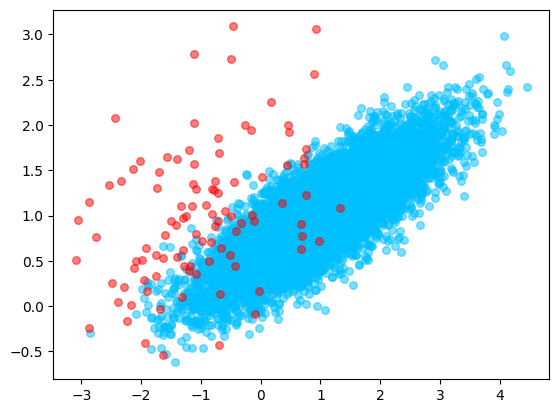

In [ ]:
plt.scatter(X[y==0,0],X[y==0,1],color='DeepSkyBlue',s=30,alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1],color='red',s=30,alpha=0.5)
plt.show()

In [ ]:
minority_features = X[y==1]

In [ ]:
lb = minority_features.min(axis=0)
ub = minority_features.max(axis=0)

In [ ]:
# we generate a lot of points between lb and ub
testpoints = np.random.uniform(low=lb,high=ub, size=(10000,2))

In [ ]:
testpoints

array([[-0.14050826,  2.84973473],
       [-0.90232546,  1.60357875],
       [-0.31174657, -0.05638919],
       ...,
       [ 1.26895172,  2.12164745],
       [ 0.4041814 ,  1.10733631],
       [-2.85832309,  2.37348831]])

In [ ]:
pdf = fastkde.pdf_at_points(minority_features[:,0],minority_features[:,1],list_of_points=testpoints,num_points=2**9+1)

In [ ]:
# what are the most likely good fakes
fakes = testpoints[pdf>np.percentile(pdf,65)]

In [ ]:
fakes

array([[-0.90232546,  1.60357875],
       [-2.36701029,  0.89229766],
       [-1.37954083,  0.50448615],
       ...,
       [-0.08302474,  1.07891713],
       [-1.3843487 ,  0.83326746],
       [ 0.4041814 ,  1.10733631]])

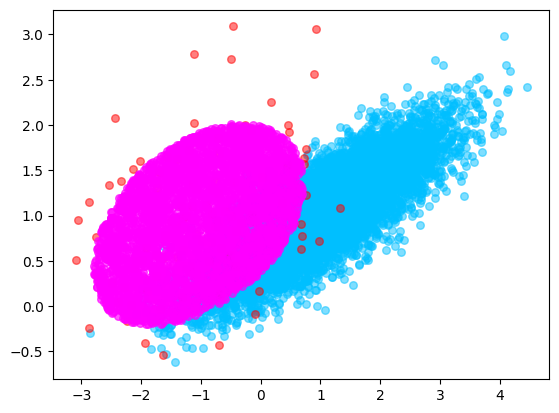

In [ ]:
plt.scatter(X[y==0,0],X[y==0,1],color='DeepSkyBlue',s=30,alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1],color='red',s=30,alpha=0.5)
plt.scatter(fakes[:,0],fakes[:,1],color='magenta',s=30,alpha=0.65)
plt.show()

In [ ]:
y.shape

(10000,)

In [ ]:
X = np.row_stack([X,fakes])
y = np.concatenate([y,np.ones(len(fakes))])

In [ ]:
# let's test some classifiers with fake data
model = KNeighborsClassifier(n_neighbors=5,weights='uniform')
model.fit(X,y)

KNeighborsClassifier()

In [ ]:
model.score(X,y)

0.9235333333333333

In [ ]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

In [ ]:
print(CR(y,model.predict(X)))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      9900
           1       0.19      0.86      0.31       100

    accuracy                           0.96     10000
   macro avg       0.59      0.91      0.64     10000
weighted avg       0.99      0.96      0.97     10000



<Figure size 500x500 with 0 Axes>

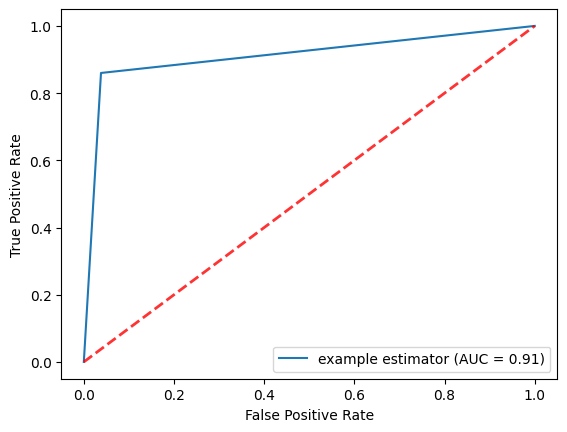

In [ ]:
plt.figure(figsize=(5,5))
fpr, tpr, thresholds =roc_curve(y, model.predict(X))
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
plt.show()

In [ ]:
# here we have X,y as the originals
model.fit(X,y)

KNeighborsClassifier()

In [ ]:
print(CR(y,model.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9900
           1       0.87      0.59      0.70       100

    accuracy                           0.99     10000
   macro avg       0.93      0.79      0.85     10000
weighted avg       0.99      0.99      0.99     10000



# Without Class Augmentation

In [ ]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
model.fit(X,y)

KNeighborsClassifier()

<Figure size 500x500 with 0 Axes>

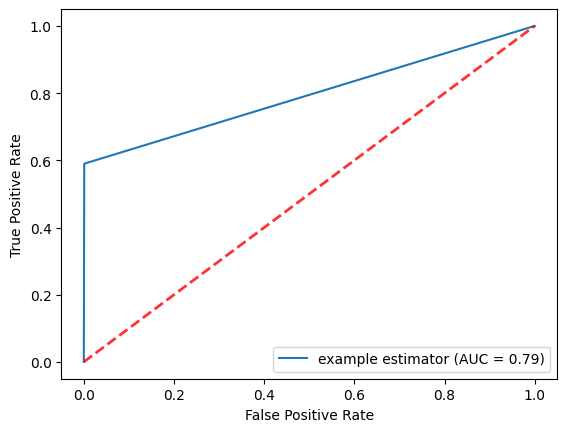

In [ ]:
plt.figure(figsize=(5,5))
fpr, tpr, thresholds =roc_curve(y, model.predict(X))
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
plt.show()

In [ ]:
roc_auc

0.7945454545454544